In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [2]:
#export
import k1lib, torch, math, time
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [3]:
class FunctionDataset(Dataset):
    def __init__(self, function: callable, start: float=-5, stop: float=5, samples: int=300):
        self.function = function; self.start = start; self.stop = stop; self.samples = samples
    def __len__(self): return self.samples
    def withNSamples(self, samples):
        self.samples = samples;
        return self
    def __getitem__(self, index):
        x = index/self.samples * (self.stop - self.start) + self.start
        return x, self.function(x)
expF = lambda x: torch.exp(x)
logF = lambda x: torch.log(x)
invF = lambda x: 1 / x
linF = lambda x: 2 * x + 8
sinF = lambda x: torch.sin(x)
expDl = DataLoader(FunctionDataset(lambda x: np.exp(x), samples=10000), batch_size=1280)
logDl = DataLoader(FunctionDataset(lambda x: np.log(x), samples=10000), batch_size=1280)
invDl = DataLoader(FunctionDataset(invF, samples=10001), batch_size=1280)
linDl = DataLoader(FunctionDataset(linF, samples=10000), batch_size=1280)
sinDl = DataLoader(FunctionDataset(lambda x: np.sin(x), samples=10000), batch_size=1280)

In [4]:
data = k1lib.Data.fromDataset(FunctionDataset(lambda x: np.exp(x), samples=10000), 1280)
list(data.train)[0].shape, len(data.train)

(torch.Size([2, 1280]), 7)

In [5]:
def getFunctionLearner(data, hiddenDim=10, hiddenLayers=2, dropout_p=0, useReLU=True):
    layers = [nn.Linear(1, hiddenDim)] + [nn.Linear(hiddenDim, hiddenDim) for i in range(hiddenLayers)]\
        + [nn.Linear(hiddenDim, 1), nn.ReLU() if useReLU else nn.Sigmoid(), nn.Dropout(dropout_p)]
    model = nn.Sequential(*layers)
    learner = k1lib.Learner(model, data, torch.optim.AdamW(model.parameters(), lr=3e-4), nn.MSELoss())
    learner.cbs.withModifyBatch(lambda x, y: (x[:, None], y)).withModifyOutput(lambda y: y.squeeze())
    return learner
#getFunctionLearner(data).run(100)

In [18]:
learner = getFunctionLearner(data)
#learner.withHooks()
learner.run(100);
#learner.cbs.withParamFinder(); learner.ParamFinder.run().plot()

Progress: 99%, epoch: 99/100, batch: 0/1, elapsed: 3.33s          

In [23]:
a = learner.HookModule[0]

In [26]:
a.forward.means

[0.1248096153140068,
 0.12722711265087128,
 0.1280786395072937,
 0.12320132553577423,
 0.13195478916168213,
 0.11174341291189194,
 0.12410005927085876,
 0.12112300843000412,
 0.12436576187610626,
 0.12679393589496613,
 0.12767091393470764,
 0.12284867465496063,
 0.13161106407642365,
 0.11150751262903214,
 0.12387251853942871,
 0.12094709277153015,
 0.12422790378332138,
 0.12669502198696136,
 0.1276097446680069,
 0.12282279878854752,
 0.1316135823726654,
 0.1115308552980423,
 0.12392173707485199,
 0.12101394683122635,
 0.12431556731462479,
 0.12680262327194214,
 0.1277352273464203,
 0.12295732647180557,
 0.1317778080701828,
 0.11167433112859726,
 0.12410266697406769,
 0.1212032288312912,
 0.12452683597803116,
 0.12703515589237213,
 0.12798596918582916,
 0.12321079522371292,
 0.13207344710826874,
 0.11192376166582108,
 0.12440822273492813,
 0.12151549011468887,
 0.12486854195594788,
 0.12740497291088104,
 0.12837906181812286,
 0.1236032024025917,
 0.13252617418766022,
 0.1123018339276313

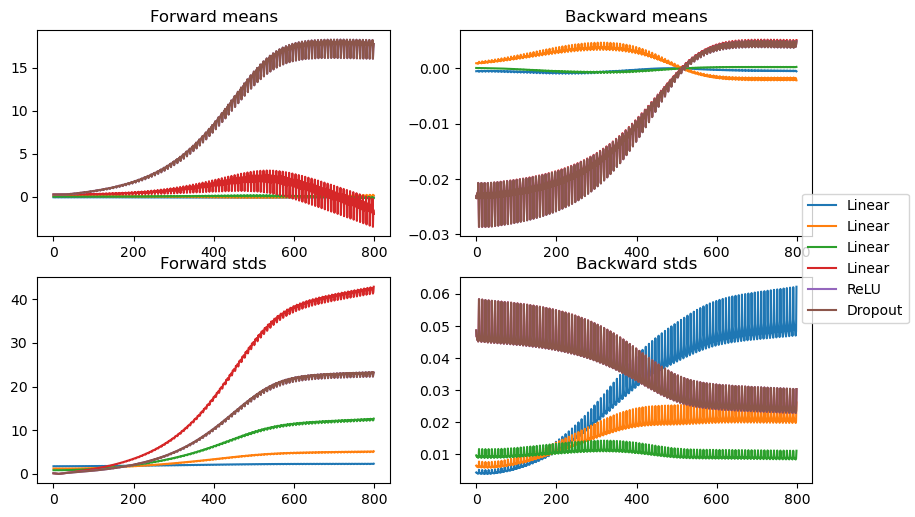

In [7]:
learner.HookModule.plot()

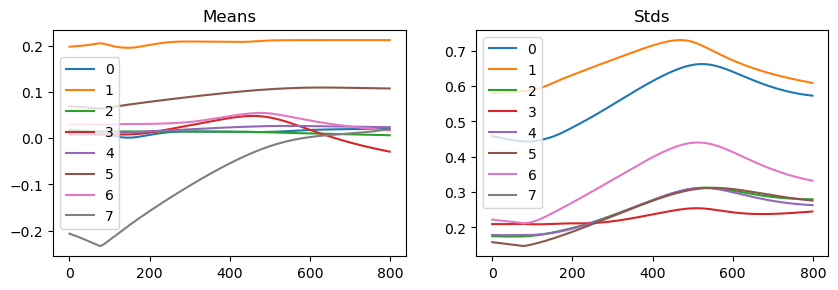

In [148]:
learner.HookParam.plot()

In [126]:
a = list(range(6))

In [127]:
a

[0, 1, 2, 3, 4, 5]

In [133]:
a[slice(6)]

[0, 1, 2, 3, 4, 5]

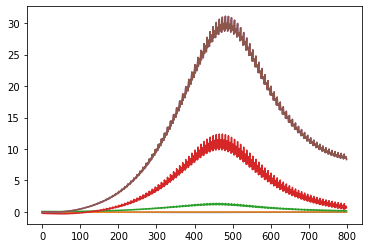

In [125]:
plt.plot(learner.HookModule[0].means)
plt.plot(learner.HookModule[1].means)
plt.plot(learner.HookModule[2].means)
plt.plot(learner.HookModule[3].means)
plt.plot(learner.HookModule[4].means)
plt.plot(learner.HookModule[5].means)

In [ ]:
learner.HookParam._parameterDatas

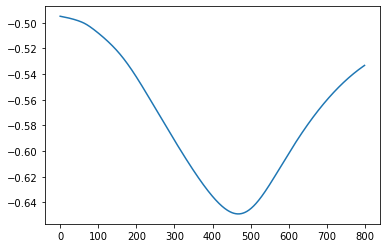

In [93]:
plt.plot(learner.HookParam._parameterDatas[0].means)

In [82]:
learner.HookModule.modules[0]

In [61]:
hooks = learner.Hooks.detach()

In [65]:
learner.opt

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0003
    weight_decay: 0.01
)

In [63]:
hooks.datas

In [58]:
learner.cbs.cbs

[<callbacks._withProgressBar.<locals>.ProgressBar at 0x7fc0837e7250>,
 <callbacks._withRecorder.<locals>.Recorder at 0x7fc0837e7dd0>,
 <callbacks.Callbacks.withModifyBatch.<locals>.ModifyBatch at 0x7fc0837e7910>,
 <callbacks.Callbacks.withModifyOutput.<locals>.ModifyOutput at 0x7fc0837e7e50>]

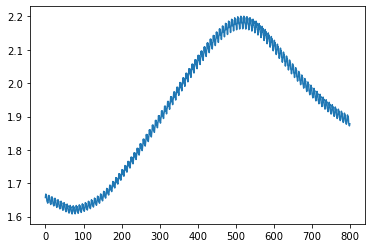

In [113]:
plt.plot(a.stds)

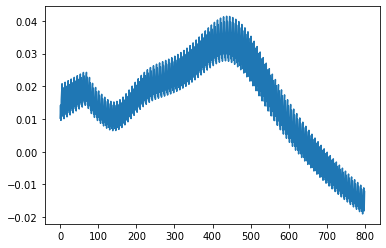

In [112]:
plt.plot(a.means)

Progress: 5%, epoch: 0/10, batch: 35/64, elapsed: 0.06s           

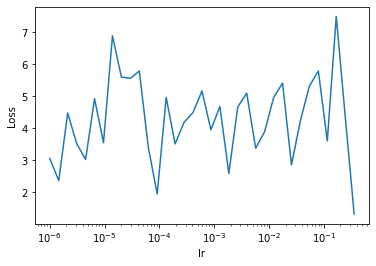

In [7]:
learner = getFunctionLearner(data); learner.run(10)
learner.cbs.withParamFinder(); learner.ParamFinder.run().plot()

Progress: 6%, epoch: 0/10, batch: 36/64, elapsed: 0.06s            

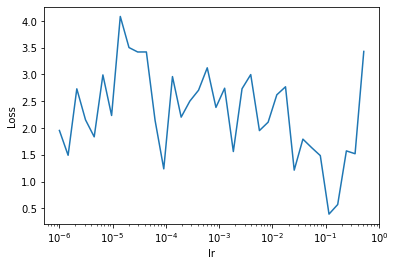

In [8]:
learner = getFunctionLearner(data); learner.run(50)
learner.cbs.withParamFinder(); learner.ParamFinder.run().plot()

Progress: 5%, epoch: 0/10, batch: 29/64, elapsed: 0.05s               

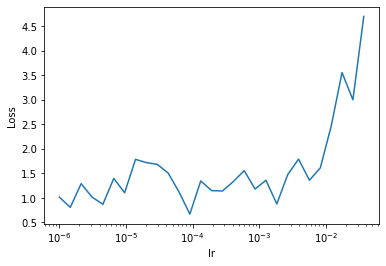

In [9]:
learner = getFunctionLearner(data); learner.run(300)
learner.cbs.withParamFinder(); learner.ParamFinder.run().plot()

In [69]:
learner = getFunctionLearner(data)
learner.opt = torch.optim.AdamW(learner.model.parameters(), 3e-4)
learner.run(200)

Progress: 100%, epoch: 199/200, batch: 0/1, elapsed: 9.13s         

In [80]:
for layer in learner.model:
    print(layer, type(layer))

Linear(in_features=1, out_features=10, bias=True) <class 'torch.nn.modules.linear.Linear'>
Linear(in_features=10, out_features=10, bias=True) <class 'torch.nn.modules.linear.Linear'>
Linear(in_features=10, out_features=10, bias=True) <class 'torch.nn.modules.linear.Linear'>
Linear(in_features=10, out_features=1, bias=True) <class 'torch.nn.modules.linear.Linear'>
ReLU() <class 'torch.nn.modules.activation.ReLU'>
Dropout(p=0, inplace=False) <class 'torch.nn.modules.dropout.Dropout'>


In [82]:
a = learner.model[0]

In [83]:
a.register_forward_hook()

Linear(in_features=1, out_features=10, bias=True)

In [78]:
list(learner.model.parameters())

[Parameter containing:
 tensor([[ 0.4935],
         [-0.1716],
         [ 0.4285],
         [-0.0229],
         [ 0.9634],
         [ 0.2484],
         [-0.1973],
         [-1.0002],
         [-0.8722],
         [-0.5739]], requires_grad=True), Parameter containing:
 tensor([ 0.0716, -0.0434,  0.1391,  0.2987,  0.6251, -1.4762,  0.1778,  0.2473,
          0.2166,  1.1848], requires_grad=True), Parameter containing:
 tensor([[ 0.2455,  0.3113,  0.3146,  0.0317,  0.5097,  0.6901, -0.4363, -0.7122,
          -0.4415, -0.6182],
         [-0.0559,  0.1966, -0.0282, -0.3370, -0.0284,  1.0616, -0.2600, -0.4941,
          -0.2847, -0.7008],
         [-0.2550,  0.5372,  0.0748, -0.1054,  0.2552,  0.7320, -0.3111, -0.1667,
          -0.2699, -0.5990],
         [ 0.0746,  0.1157,  0.0968, -0.2201,  0.4598,  0.7462, -0.2260, -0.5129,
          -0.2706, -0.4428],
         [ 0.1804, -0.3576,  0.1222,  0.3243, -0.0301, -0.9804,  0.3663, -0.1168,
          -0.2841, -0.0737],
         [ 0.1212, -0.1721

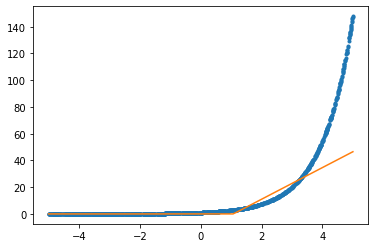

In [70]:
plt.plot(*next(iter(data.train)), ".")
x = torch.linspace(-5, 5, 100)
plt.plot(x, learner.model(x[:, None]).detach().squeeze())

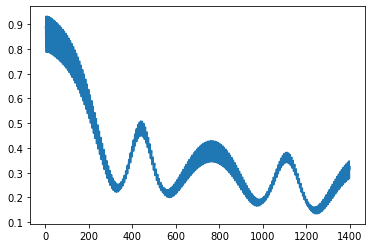

In [61]:
plt.plot(learner.Recorder.losses.train)

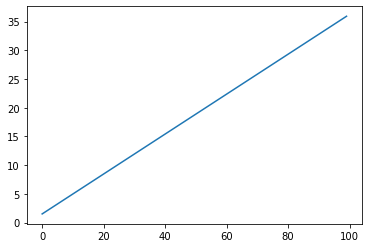

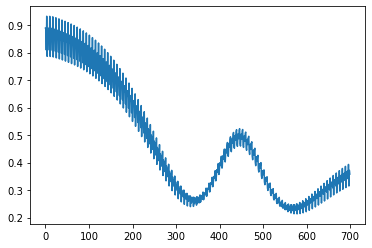

In [36]:
plt.plot(learner.Recorder.losses.train)

Progress: 36%, epoch: 3/10, batch: 4/7, elapsed: 0.17s              

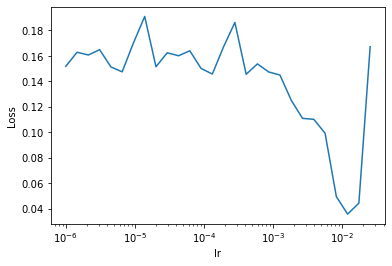

In [86]:
learner = getFunctionLearner(data); learner.run(300)
learner.cbs.withParamFinder(); learner.ParamFinder.run().plot()

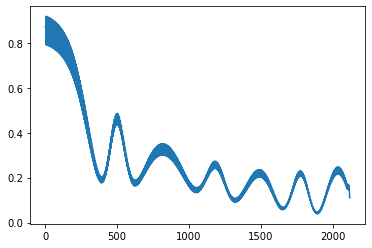

In [87]:
plt.plot(learner.Recorder.losses.train)

In [67]:
learner = getFunctionLearner(data); learner.run(300)

Progress: 100%, epoch: 299/300, batch: 0/1, elapsed: 13.7s          

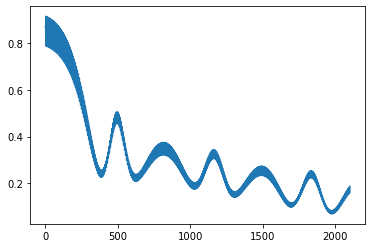

In [61]:
plt.plot(learner.Recorder.losses.train)

Progress: 43%, epoch: 4/10, batch: 2/7, elapsed: 0.23s         

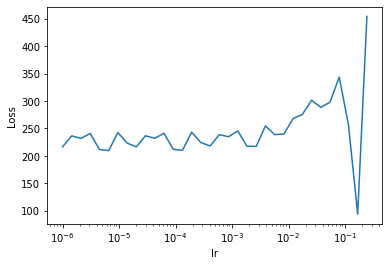

In [44]:
learner.cbs.withParamFinder(); learner.ParamFinder.run().plot()

In [ ]:
learner.run(100)

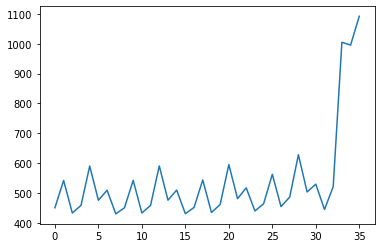

In [34]:
plt.plot(learner.ParamFinder.losses)

In [26]:
%lprun -f klib.Learner._run1Epoch learner.run(100, cbs.withModifyBatch(lambda x, y: (x[:, None], y)).withModifyOutput(lambda y: y.squeeze()))

Progress: 99%, epoch: 99/100, batch: 0/1, elapsed: 5.89s          

Timer unit: 1e-06 s

Total time: 5.8897 s
File: /home/kelvin/repos/labs/klib/learner.py
Function: _run1Epoch at line 17

Line #      Hits         Time  Per Hit   % Time  Line Contents
    17                                               def _run1Epoch(self):
    18       100       7176.0     71.8      0.1          self.cbs("startEpoch")
    19       100        101.0      1.0      0.0          try:
    20       100       9195.0     92.0      0.2              self.nBatches = len(self.data.train); self.model.train()
    21       100    5192943.0  51929.4     88.2              [self._run1Batch() for self.batch, (self.xb, self.yb) in enumerate(self.data.train)]
    22       100      16802.0    168.0      0.3              self.nBatches = len(self.data.valid); self.model.eval(); self.cbs("startValidBatches")
    23       100     645919.0   6459.2     11.0              [self._run1Batch() for self.batch, (self.xb, self.yb) in enumerate(self.data.valid)]
    24                                   

In [7]:
len(learner.Recorder.losses.train)

2100

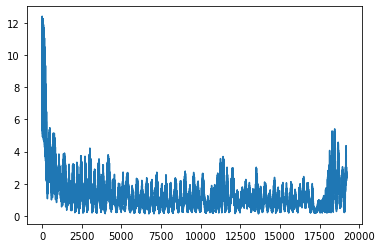

In [78]:
plt.plot(learner.Recorder.losses.train)

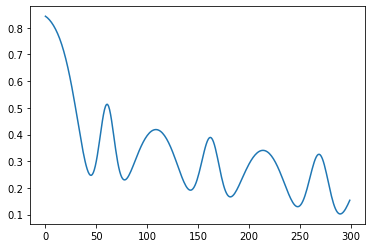

In [18]:
plt.plot(learner.Recorder.losses.epoch.train)

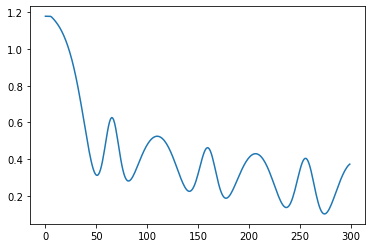

In [54]:
plt.plot(learner.Recorder.losses.epoch.valid)

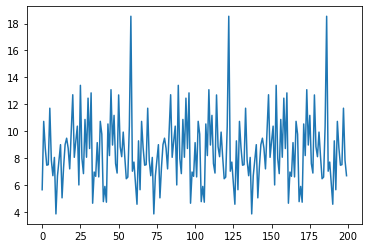

In [42]:
plt.plot(learner.Recorder.losses.train[:200])

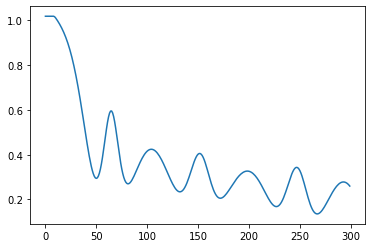

In [98]:
plt.plot(learner.Recorder.losses.epoch.valid);

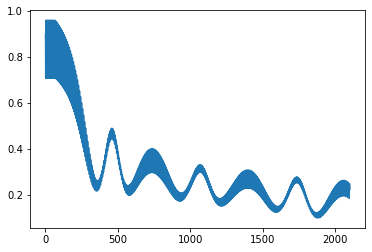

In [99]:
plt.plot(learner.Recorder.losses.train);

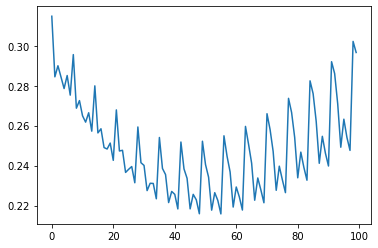

In [22]:
plt.plot(learner.Recorder.losses.train[500:600])

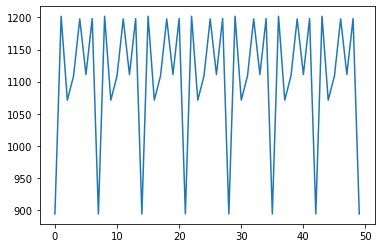

In [61]:
plt.plot(learner.Recorder.losses.train[3500:3550])

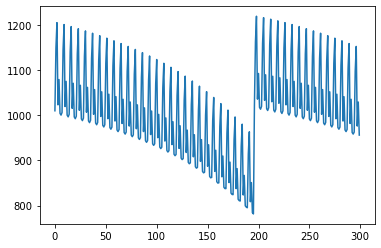

In [50]:
plt.plot(learner.Recorder.losses.train[3500:3800])

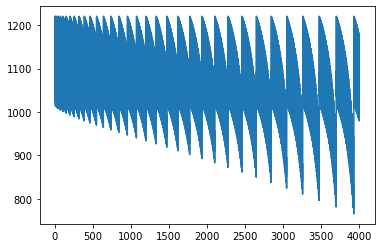

In [48]:
plt.plot(learner.Recorder.losses.train[:4000])

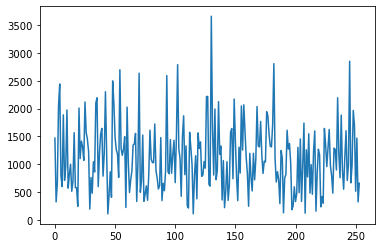

In [26]:
plt.plot(learner.Recorder.losses.train[::5000])

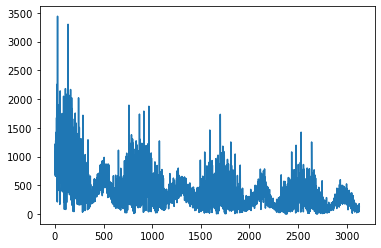

In [76]:
plt.plot(learner.Recorder.losses)

In [73]:
class NN(nn.Module):
    def __init__(self, hiddenDim=10, hiddenLayers=2, dropout_p=0, useReLU=True):
        super().__init__()
        self.fc_begin = nn.Linear(1, hiddenDim)
        self.fc1 = nn.Linear(hiddenDim, hiddenDim)
        self.fc2 = nn.Linear(hiddenDim, hiddenDim)
        self.fc3 = nn.Linear(hiddenDim, hiddenDim)
        self.fc4 = nn.Linear(hiddenDim, hiddenDim)
        self.fc_end = nn.Linear(hiddenDim, 1)
        self.activation = nn.ReLU() if useReLU else nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_p)
        self.totalLosses = []
        self.hiddenLayers = hiddenLayers
        pass
    def forward(self, x):
        x = self.dropout(self.activation(self.fc_begin(x)))
        # really ad-hoc way of doing this, but pytorch doesn't allow me to bunch this up into a list
        if self.hiddenLayers >= 1: x = self.dropout(self.activation(self.fc1(x)))
        if self.hiddenLayers >= 2: x = self.dropout(self.activation(self.fc2(x)))
        if self.hiddenLayers >= 3: x = self.dropout(self.activation(self.fc3(x)))
        if self.hiddenLayers >= 4: x = self.dropout(self.activation(self.fc4(x)))
        x = self.fc_end(x)
        return x
    
    def train(self, dl, lossFunction=nn.MSELoss(), optimizer=None, lr=0.01, epochs=500):
        if optimizer == None:
            optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        for epoch in range(epochs):
            totalLoss = 0
            for x, y in dl:
                optimizer.zero_grad()
                x = x.view(-1, 1).float()
                output = self.forward(x)
                loss = lossFunction(output, y.view(-1, 1).float())
                loss.backward()
                totalLoss += loss.item()
                optimizer.step()
            totalLoss /= dl.batch_size
            self.totalLosses.append(totalLoss)
    def plot(self, x, function: callable=None):
        plt.figure(num=None, figsize=(10, 6), dpi=350)
        x = x.view(-1, 1)
        plt.subplot(2, 1, 1)
        plt.plot(x.squeeze(), self(x).detach().cpu().squeeze(), ".")
        plt.legend(["Learned"])
        if function != None:
            plt.subplot(2, 1, 2)
            plt.plot(x, function(x), ".")
            plt.legend(["Real"])
        plt.show()
    def plotLosses(self, begin=0, end=0):
        plt.figure(num=None, figsize=(10, 3), dpi=350)
        if end == 0:
            end = len(self.totalLosses)
        plt.plot(range(len(self.totalLosses))[begin:end], self.totalLosses[begin:end])
        plt.legend(["Loss"])
        plt.show()

CPU times: user 25.3 s, sys: 43.4 ms, total: 25.3 s
Wall time: 8.95 s


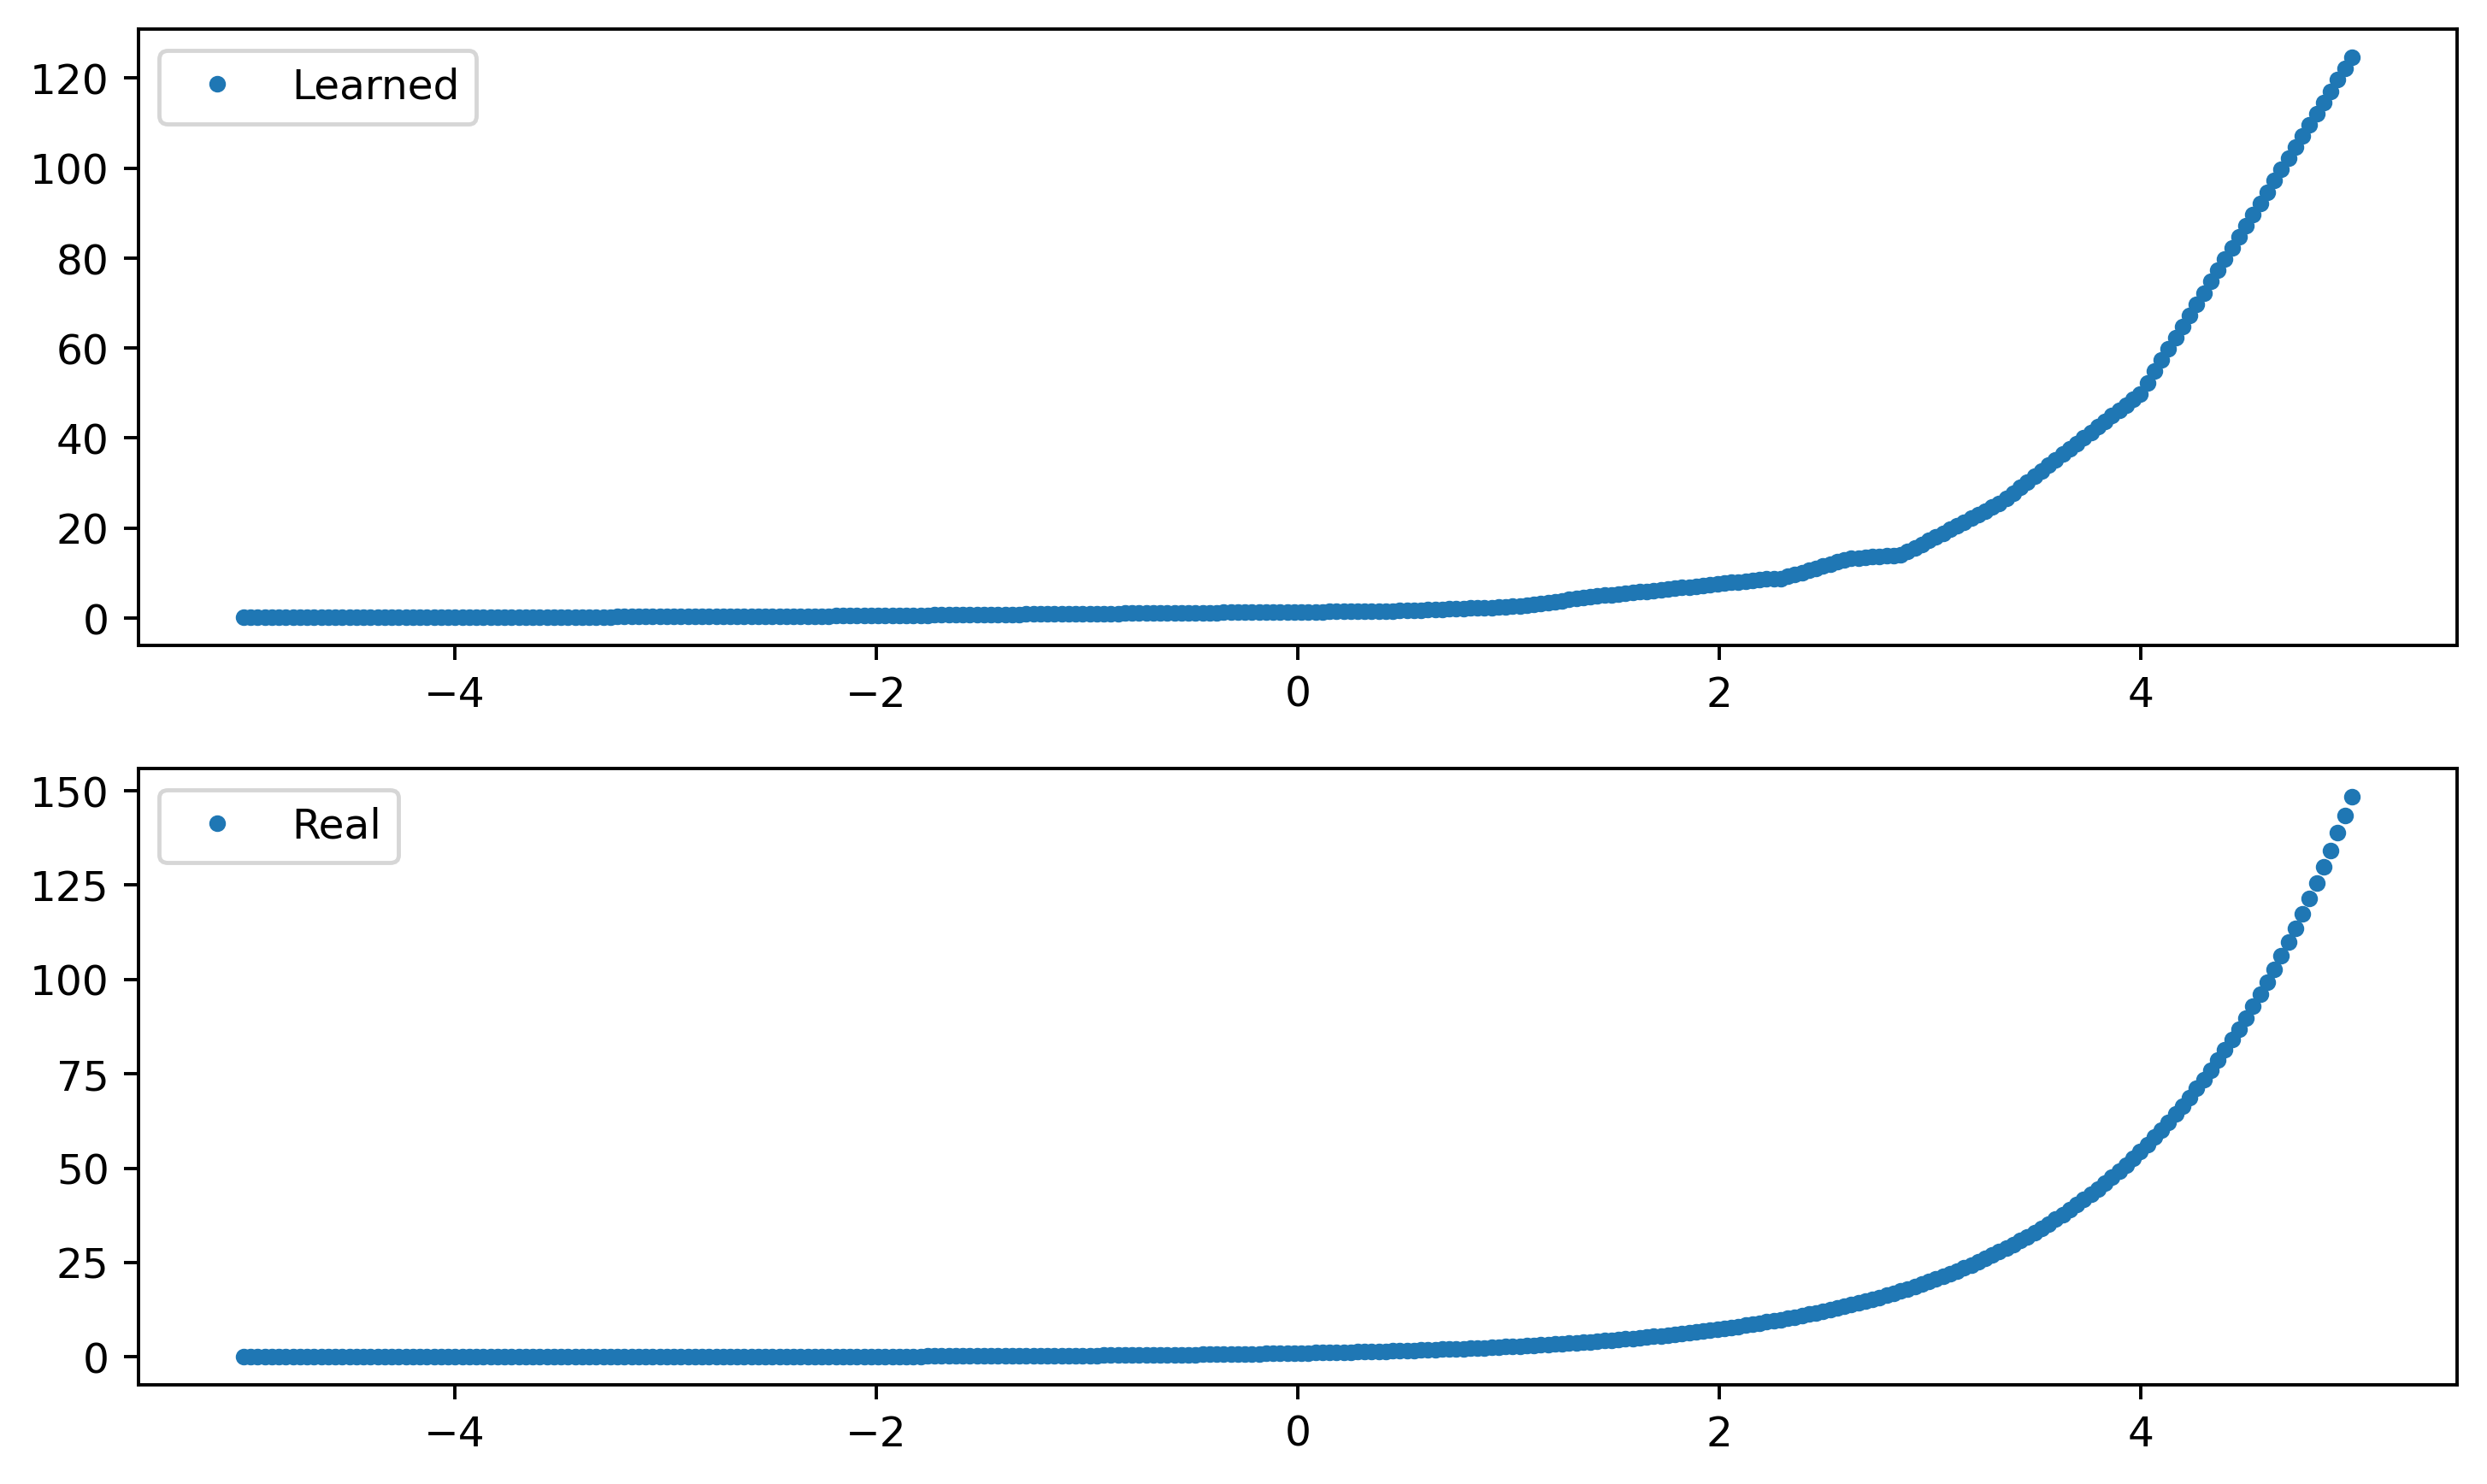

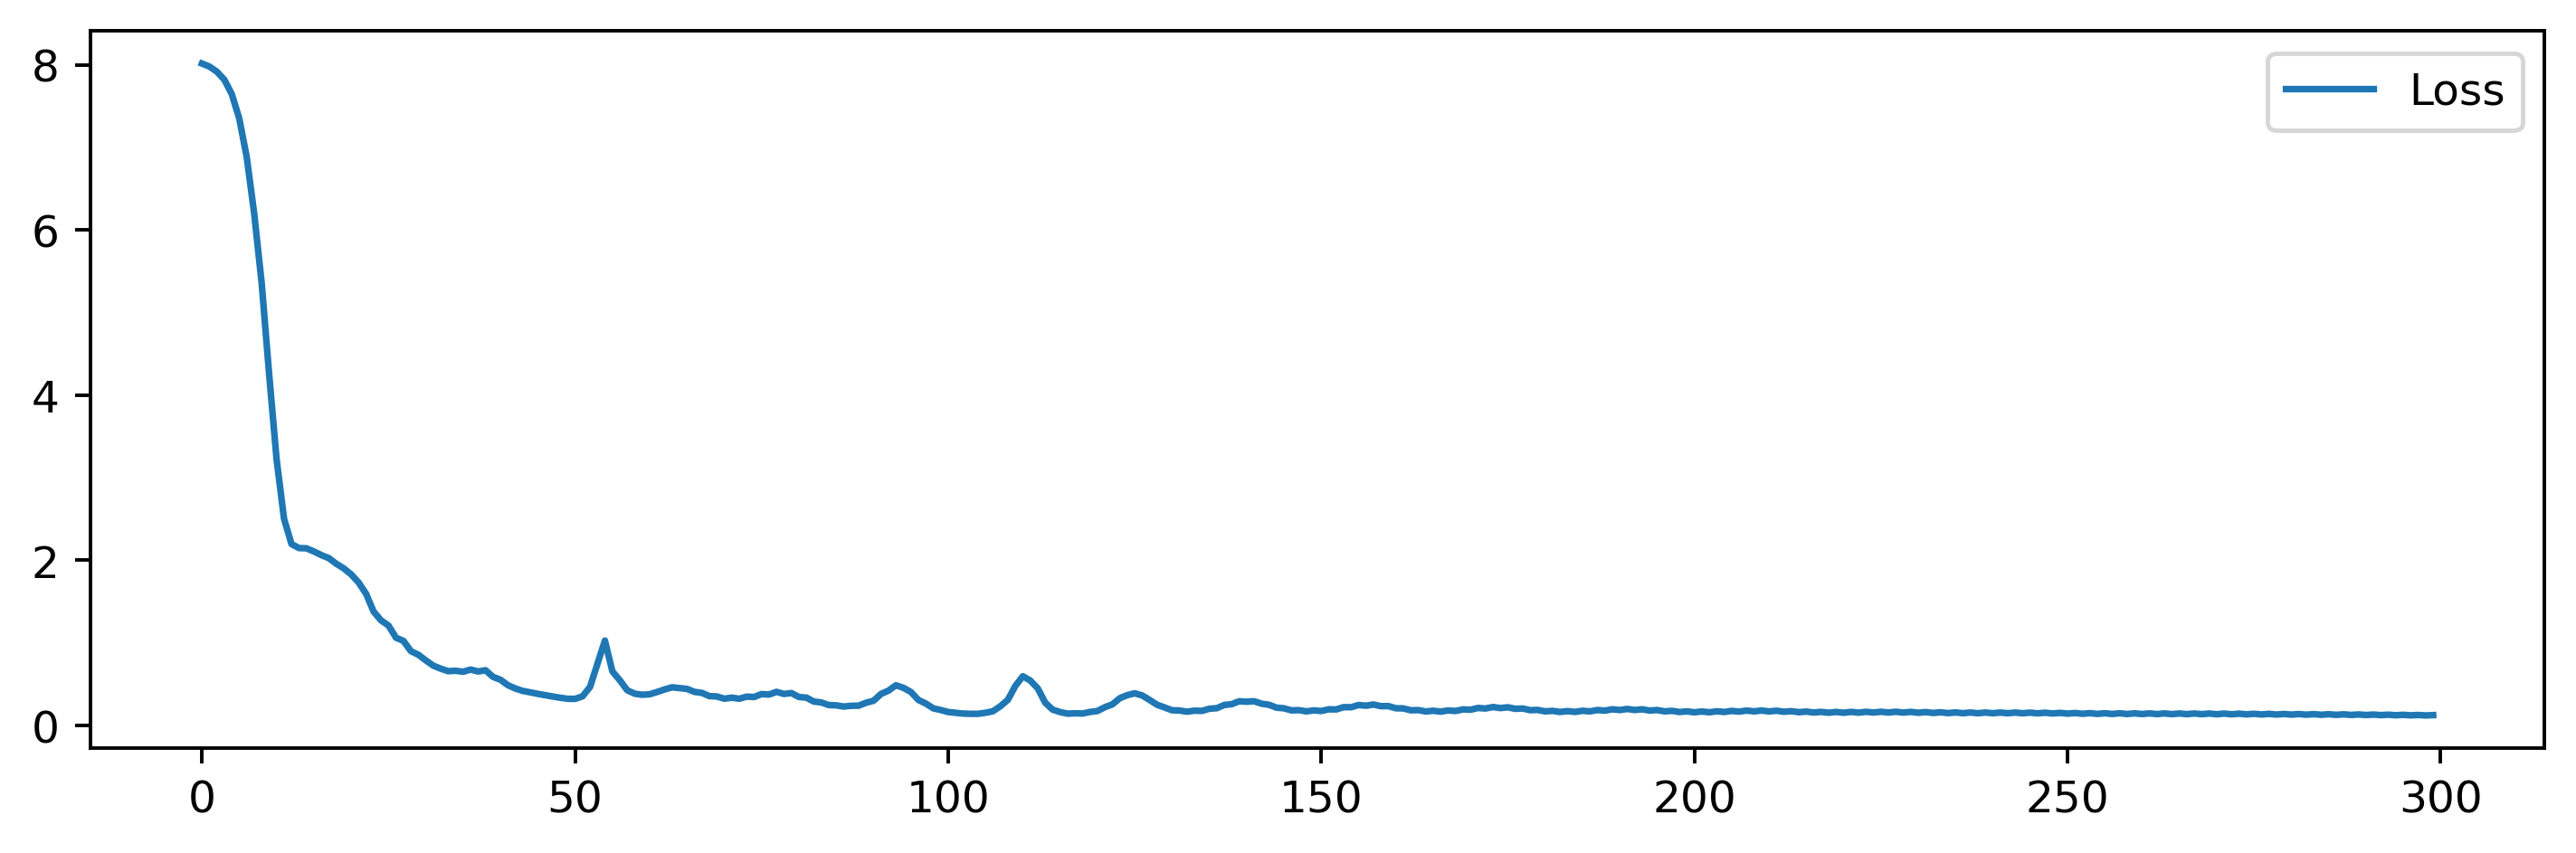

In [74]:
net = NN()
%time net.train(expDl, epochs=300)
net.plot(torch.linspace(-5, 5, 300), expF)
net.plotLosses()